In [1]:
import pandas as pd
# Replace 'dataset.csv' with the actual file path
df = pd.read_csv('Clothing Brand Preferences (1).csv')

# Display the first few rows of the DataFrame
df.head()

,1. Are you currently employed?,2. What is your age? (eg:21),3. What is your gender?,4. How much is your monthly expenses? (eg:1500)\n,5. How much do you usually spend on clothes? (eg:100),6. How important is the clothing price as buying factor?,7. How important is the clothing quality to you?,8. How important is the style offered by a clothing brand?,9. How important is the image of a clothing brand?,10. How important is the accessibility of a clothing brand store's location?,11. What clothing types do you typically purchase?\n,12. Which shopping platform do you prefer the most?\n,13. Which clothing brand do you prefer?
0,No,14,Female,250,149,Very important,Not important,Not important,Not important,Not important,Sports wear,In-store shopping,Brands Outlet
1,Yes,22,Male,1500,300,Not important,Very important,Moderately important,Very important,Very important,Formal wear,Both,Uniqlo
2,Yes,20,Male,1400,400,Not important,Very important,Moderately important,Very important,Very important,Formal wear,Both,Uniqlo
3,Yes,22,Male,1300,250,Not important,Very important,Moderately important,Very important,Very important,Formal wear,Both,Uniqlo
4,No,19,Male,450,180,Very important,Not important,Not important,Not important,Not important,Sports wear,In-store shopping,Brands Outlet


In [2]:
# Replace attribute name
original_column_names = ['Are you currently employed?',
                          'What is your age? (eg:21)',
                          'What is your gender?',
                          'How much is your monthly expenses? (eg:1500)',
                          'How much do you usually spend on clothes? (eg:100)',
                          'How important is the clothing price as buying factor?',
                          'How important is the clothing quality to you?',
                          'How important is the style offered by a clothing brand?',
                          'How important is the image of a clothing brand?',
                          'How important is the accessibility of a clothing brand store\'s location?',
                          'What clothing types do you typically purchase?',
                          'Which shopping platform do you prefer the most?',
                          'Which clothing brand do you prefer?']

# Define simplified column names
new_column_names = [
    'Employment',
    'Age',
    'Gender',
    'MonthlyExpenses',
    'ClothesExpenses',
    'PriceImportance',
    'QualityImportance',
    'StyleImportance',
    'BrandImageImportance',
    'LocationImportance',
    'PurchasedClothingTypes',
    'PreferredShoppingPlatform',
    'PreferredClothingBrand'
]

# Rename columns in the DataFrame
df.columns = new_column_names

# Display the DataFrame with updated column names
df.head()


,Employment,Age,Gender,MonthlyExpenses,ClothesExpenses,PriceImportance,QualityImportance,StyleImportance,BrandImageImportance,LocationImportance,PurchasedClothingTypes,PreferredShoppingPlatform,PreferredClothingBrand
0,No,14,Female,250,149,Very important,Not important,Not important,Not important,Not important,Sports wear,In-store shopping,Brands Outlet
1,Yes,22,Male,1500,300,Not important,Very important,Moderately important,Very important,Very important,Formal wear,Both,Uniqlo
2,Yes,20,Male,1400,400,Not important,Very important,Moderately important,Very important,Very important,Formal wear,Both,Uniqlo
3,Yes,22,Male,1300,250,Not important,Very important,Moderately important,Very important,Very important,Formal wear,Both,Uniqlo
4,No,19,Male,450,180,Very important,Not important,Not important,Not important,Not important,Sports wear,In-store shopping,Brands Outlet


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Employment                 510 non-null    object
 1   Age                        510 non-null    int64 
 2   Gender                     510 non-null    object
 3   MonthlyExpenses            510 non-null    int64 
 4   ClothesExpenses            510 non-null    int64 
 5   PriceImportance            510 non-null    object
 6   QualityImportance          510 non-null    object
 7   StyleImportance            510 non-null    object
 8   BrandImageImportance       510 non-null    object
 9   LocationImportance         510 non-null    object
 10  PurchasedClothingTypes     510 non-null    object
 11  PreferredShoppingPlatform  510 non-null    object
 12  PreferredClothingBrand     510 non-null    object
dtypes: int64(3), object(10)
memory usage: 51.9+ KB


In [4]:
# Specify the column name
column_name = 'Age'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers using boolean indexing
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Display rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)
num_outliers = outliers.sum()
print(f"Number of outliers in {column_name}: {num_outliers}")

14.5
26.5
Rows with outliers:
    Employment  Age  Gender  MonthlyExpenses  ClothesExpenses  \
0           No   14  Female              250              149   
30          No   13  Female              500              200   
32          No   14    Male              350              200   
48          No   14    Male              496              143   
53          No   14  Female              300              200   
64          No   43  Female             2000              400   
89         Yes   33    Male             3000              500   
92          No   13    Male              200              150   
103         No   33  Female             3500              400   
112         No   14    Male              350              200   
125         No   14  Female              450              125   
135         No   29  Female             1000              200   
137         No   14  Female              349              200   
147         No   13    Male              250              10

In [5]:
# Replace outliers with the median
median_value = df[column_name].median()
df.loc[outliers, column_name] = median_value

# Check if outliers are successfully replaced
updated_outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
print("Rows with outliers after transformation:")
print(df[updated_outliers])

Rows with outliers after transformation:
Empty DataFrame
Columns: [Employment, Age, Gender, MonthlyExpenses, ClothesExpenses, PriceImportance, QualityImportance, StyleImportance, BrandImageImportance, LocationImportance, PurchasedClothingTypes, PreferredShoppingPlatform, PreferredClothingBrand]
Index: []


In [6]:
# Specify the column name
column_name = 'MonthlyExpenses'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers using boolean indexing
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Display rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)
num_outliers = outliers.sum()
print(f"Number of outliers in {column_name}: {num_outliers}")

-784.375
2550.625
Rows with outliers:
    Employment  Age  Gender  MonthlyExpenses  ClothesExpenses  \
89         Yes   21    Male             3000              500   
103         No   21  Female             3500              400   
317        Yes   21    Male             4000              500   
439        Yes   21    Male             3000              550   

          PriceImportance     QualityImportance       StyleImportance  \
89   Moderately important        Very important         Not important   
103        Very important  Moderately important  Moderately important   
317        Very important  Moderately important         Not important   
439        Very important        Very important        Very important   

    BrandImageImportance    LocationImportance PurchasedClothingTypes  \
89        Very important  Moderately important            Sports wear   
103       Very important  Moderately important            Casual wear   
317        Not important  Moderately important     

In [7]:
# Replace outliers with the median
median_value = df[column_name].median()
df.loc[outliers, column_name] = median_value

# Check if outliers are successfully replaced
updated_outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
print("Rows with outliers after transformation:")
print(df[updated_outliers])

Rows with outliers after transformation:
Empty DataFrame
Columns: [Employment, Age, Gender, MonthlyExpenses, ClothesExpenses, PriceImportance, QualityImportance, StyleImportance, BrandImageImportance, LocationImportance, PurchasedClothingTypes, PreferredShoppingPlatform, PreferredClothingBrand]
Index: []


In [8]:
# Specify the column name
column_name = 'ClothesExpenses'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers using boolean indexing
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Display rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)
num_outliers = outliers.sum()
print(f"Number of outliers in {column_name}: {num_outliers}")

-75.0
525.0
Rows with outliers:
    Employment  Age  Gender  MonthlyExpenses  ClothesExpenses PriceImportance  \
403        Yes   21  Female             2500             1000   Not important   
439        Yes   21    Male              780              550  Very important   

    QualityImportance StyleImportance BrandImageImportance LocationImportance  \
403     Not important   Not important        Not important      Not important   
439    Very important  Very important        Not important      Not important   

    PurchasedClothingTypes PreferredShoppingPlatform PreferredClothingBrand  
403            Casual wear                      Both                 Uniqlo  
439            Formal wear                      Both                 Uniqlo  
Number of outliers in ClothesExpenses: 2


In [9]:
# Replace outliers with the median
median_value = df[column_name].median()
df.loc[outliers, column_name] = median_value

# Check if outliers are successfully replaced
updated_outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
print("Rows with outliers after transformation:")
print(df[updated_outliers])

Rows with outliers after transformation:
Empty DataFrame
Columns: [Employment, Age, Gender, MonthlyExpenses, ClothesExpenses, PriceImportance, QualityImportance, StyleImportance, BrandImageImportance, LocationImportance, PurchasedClothingTypes, PreferredShoppingPlatform, PreferredClothingBrand]
Index: []


In [10]:
# Specify the column name
column_name = 'Age'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers using boolean indexing
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Display rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)
num_outliers = outliers.sum()
print(f"Number of outliers in {column_name}: {num_outliers}")

17.0
25.0
Rows with outliers:
    Employment  Age  Gender  MonthlyExpenses  ClothesExpenses PriceImportance  \
7           No   16  Female              500              163  Very important   
10          No   15    Male              250              100  Very important   
35          No   26  Female              500              200  Very important   
36          No   16    Male              350              200  Very important   
42          No   15    Male              200              126  Very important   
65          No   15  Female              500              200  Very important   
71          No   15  Female              400              145  Very important   
79          No   15    Male              459              300  Very important   
84          No   15  Female              458              133  Very important   
87          No   15    Male              450              130  Very important   
111         No   15  Female              452              200  Very important  

In [11]:
# Replace outliers with the median
median_value = df[column_name].median()
df.loc[outliers, column_name] = median_value

# Check if outliers are successfully replaced
updated_outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
print("Rows with outliers after transformation:")
print(df[updated_outliers])

Rows with outliers after transformation:
Empty DataFrame
Columns: [Employment, Age, Gender, MonthlyExpenses, ClothesExpenses, PriceImportance, QualityImportance, StyleImportance, BrandImageImportance, LocationImportance, PurchasedClothingTypes, PreferredShoppingPlatform, PreferredClothingBrand]
Index: []


In [12]:
# Specify the column name
column_name = 'MonthlyExpenses'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers using boolean indexing
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Display rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)
num_outliers = outliers.sum()
print(f"Number of outliers in {column_name}: {num_outliers}")

-784.375
2550.625
Rows with outliers:
Empty DataFrame
Columns: [Employment, Age, Gender, MonthlyExpenses, ClothesExpenses, PriceImportance, QualityImportance, StyleImportance, BrandImageImportance, LocationImportance, PurchasedClothingTypes, PreferredShoppingPlatform, PreferredClothingBrand]
Index: []
Number of outliers in MonthlyExpenses: 0


In [13]:
# Specify the column name
column_name = 'ClothesExpenses'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers using boolean indexing
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Display rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)
num_outliers = outliers.sum()
print(f"Number of outliers in {column_name}: {num_outliers}")

-75.0
525.0
Rows with outliers:
Empty DataFrame
Columns: [Employment, Age, Gender, MonthlyExpenses, ClothesExpenses, PriceImportance, QualityImportance, StyleImportance, BrandImageImportance, LocationImportance, PurchasedClothingTypes, PreferredShoppingPlatform, PreferredClothingBrand]
Index: []
Number of outliers in ClothesExpenses: 0


In [14]:
# Specify the column name
column_name = 'Age'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers using boolean indexing
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Display rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)
num_outliers = outliers.sum()
print(f"Number of outliers in {column_name}: {num_outliers}")

17.0
25.0
Rows with outliers:
Empty DataFrame
Columns: [Employment, Age, Gender, MonthlyExpenses, ClothesExpenses, PriceImportance, QualityImportance, StyleImportance, BrandImageImportance, LocationImportance, PurchasedClothingTypes, PreferredShoppingPlatform, PreferredClothingBrand]
Index: []
Number of outliers in Age: 0


In [15]:
df.to_csv('cleaned-dataset.csv', index=False)

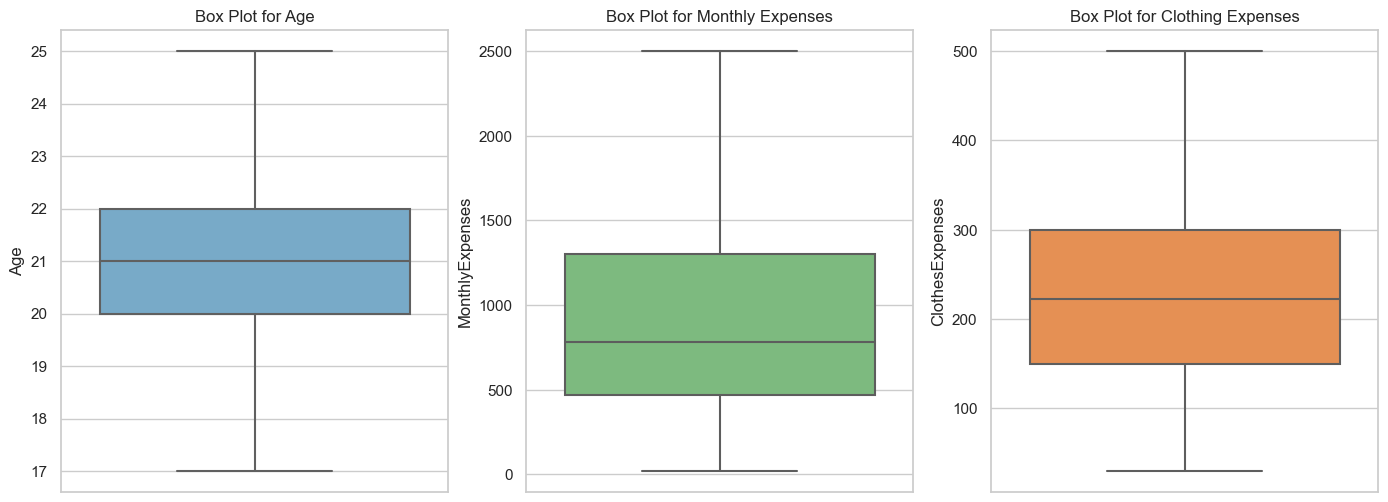

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned-dataset.csv')

# Set the style
sns.set(style="whitegrid")

# Create subplots for Age, Monthly Expenses, and Clothing Expenses
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 6))

# Box plot for Age with a different color palette
sns.boxplot(ax=axes[0], y='Age', data=df, palette='Blues')
axes[0].set_title('Box Plot for Age')

# Box plot for Monthly Expenses with a different color palette
sns.boxplot(ax=axes[1], y='MonthlyExpenses', data=df, palette='Greens')
axes[1].set_title('Box Plot for Monthly Expenses')

# Box plot for Clothing Expenses with a different color palette
sns.boxplot(ax=axes[2], y='ClothesExpenses', data=df, palette='Oranges')
axes[2].set_title('Box Plot for Clothing Expenses')

plt.show()

In [17]:
import pandas as pd
# Replace 'dataset.csv' with the actual file path
df = pd.read_csv('masterfile.csv')

# Display the first few rows of the DataFrame
df.head()

,Employment,Age,Gender,MonthlyExpenses,ClothesExpenses,PriceImportance,QualityImportance,StyleImportance,BrandImageImportance,LocationImportance,PurchasedClothingTypes,PreferredShoppingPlatform,PreferredClothingBrand
0,No,19,Male,400,300,Very important,Not important,Not important,Not important,Not important,Sports wear,In-store shopping,Brands Outlet
1,Yes,22,Female,450,300,Very important,Moderately important,Very important,Very important,Very important,Casual wear,Online shopping,H&M
2,Yes,22,Male,1300,250,Not important,Very important,Moderately important,Very important,Very important,Formal wear,Both,Uniqlo
3,No,21,Female,500,50,Very important,Very important,Not important,Not important,Moderately important,Casual wear,Online shopping,H&M
4,No,23,Female,900,300,Very important,Moderately important,Very important,Very important,Very important,Casual wear,Online shopping,H&M


In [18]:
# Specify the column name
column_name = 'Age'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers using boolean indexing
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Display rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)
num_outliers = outliers.sum()
print(f"Number of outliers in {column_name}: {num_outliers}")

14.5
26.5
Rows with outliers:
    Employment  Age  Gender  MonthlyExpenses  ClothesExpenses  \
7           No   13    Male              250              100   
19          No   14    Male              470              178   
31          No   13  Female              258              123   
36          No   14  Female              300              200   
45          No   29  Female             1000              200   
63          No   13    Male              125              110   
71         Yes   30  Female             2500              500   
74          No   14    Male              465              159   
78          No   14    Male              200               80   
83          No   14  Female              248              100   
102         No   14  Female              100               60   
131         No   33  Female             1500              400   
139         No   13  Female              340              120   
144         No   43  Female             2000              40

In [19]:
# Replace outliers with the median
median_value = df[column_name].median()
df.loc[outliers, column_name] = median_value

# Check if outliers are successfully replaced
updated_outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
print("Rows with outliers after transformation:")
print(df[updated_outliers])

Rows with outliers after transformation:
Empty DataFrame
Columns: [Employment, Age, Gender, MonthlyExpenses, ClothesExpenses, PriceImportance, QualityImportance, StyleImportance, BrandImageImportance, LocationImportance, PurchasedClothingTypes, PreferredShoppingPlatform, PreferredClothingBrand]
Index: []


In [20]:
# Specify the column name
column_name = 'MonthlyExpenses'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers using boolean indexing
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Display rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)
num_outliers = outliers.sum()
print(f"Number of outliers in {column_name}: {num_outliers}")

-787.5
2552.5
Rows with outliers:
    Employment  Age Gender  MonthlyExpenses  ClothesExpenses  \
419        Yes   21   Male             3000              500   

          PriceImportance QualityImportance StyleImportance  \
419  Moderately important    Very important   Not important   

    BrandImageImportance    LocationImportance PurchasedClothingTypes  \
419       Very important  Moderately important            Sports wear   

    PreferredShoppingPlatform PreferredClothingBrand  
419           Online shopping                 Uniqlo  
Number of outliers in MonthlyExpenses: 1


In [21]:
# Replace outliers with the median
median_value = df[column_name].median()
df.loc[outliers, column_name] = median_value

# Check if outliers are successfully replaced
updated_outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
print("Rows with outliers after transformation:")
print(df[updated_outliers])

Rows with outliers after transformation:
Empty DataFrame
Columns: [Employment, Age, Gender, MonthlyExpenses, ClothesExpenses, PriceImportance, QualityImportance, StyleImportance, BrandImageImportance, LocationImportance, PurchasedClothingTypes, PreferredShoppingPlatform, PreferredClothingBrand]
Index: []


In [22]:
# Specify the column name
column_name = 'ClothesExpenses'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers using boolean indexing
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Display rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)
num_outliers = outliers.sum()
print(f"Number of outliers in {column_name}: {num_outliers}")

-75.0
525.0
Rows with outliers:
    Employment  Age Gender  MonthlyExpenses  ClothesExpenses PriceImportance  \
270        Yes   21   Male             1000              550  Very important   

    QualityImportance StyleImportance BrandImageImportance LocationImportance  \
270    Very important  Very important        Not important      Not important   

    PurchasedClothingTypes PreferredShoppingPlatform PreferredClothingBrand  
270            Formal wear                      Both                 Uniqlo  
Number of outliers in ClothesExpenses: 1


In [23]:
# Replace outliers with the median
median_value = df[column_name].median()
df.loc[outliers, column_name] = median_value

# Check if outliers are successfully replaced
updated_outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
print("Rows with outliers after transformation:")
print(df[updated_outliers])

Rows with outliers after transformation:
Empty DataFrame
Columns: [Employment, Age, Gender, MonthlyExpenses, ClothesExpenses, PriceImportance, QualityImportance, StyleImportance, BrandImageImportance, LocationImportance, PurchasedClothingTypes, PreferredShoppingPlatform, PreferredClothingBrand]
Index: []


In [24]:
# Specify the column name
column_name = 'Age'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers using boolean indexing
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Display rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)
num_outliers = outliers.sum()
print(f"Number of outliers in {column_name}: {num_outliers}")

17.0
25.0
Rows with outliers:
    Employment  Age  Gender  MonthlyExpenses  ClothesExpenses PriceImportance  \
13          No   15    Male              420              160  Very important   
34          No   15    Male              340              122  Very important   
51          No   15    Male              459              300  Very important   
64          No   15  Female              410              200  Very important   
80          No   15    Male              200              126  Very important   
87          No   15  Female              458              133  Very important   
90          No   15    Male              450              130  Very important   
91          No   16  Female              500              360  Very important   
111         No   15    Male              250              100  Very important   
147         No   15  Female              350               80  Very important   
169         No   15  Female              350              150  Very important  

In [25]:
# Replace outliers with the median
median_value = df[column_name].median()
df.loc[outliers, column_name] = median_value

# Check if outliers are successfully replaced
updated_outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
print("Rows with outliers after transformation:")
print(df[updated_outliers])

Rows with outliers after transformation:
Empty DataFrame
Columns: [Employment, Age, Gender, MonthlyExpenses, ClothesExpenses, PriceImportance, QualityImportance, StyleImportance, BrandImageImportance, LocationImportance, PurchasedClothingTypes, PreferredShoppingPlatform, PreferredClothingBrand]
Index: []


In [26]:
# Specify the column name
column_name = 'Age'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers using boolean indexing
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Display rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)
num_outliers = outliers.sum()
print(f"Number of outliers in {column_name}: {num_outliers}")

17.0
25.0
Rows with outliers:
Empty DataFrame
Columns: [Employment, Age, Gender, MonthlyExpenses, ClothesExpenses, PriceImportance, QualityImportance, StyleImportance, BrandImageImportance, LocationImportance, PurchasedClothingTypes, PreferredShoppingPlatform, PreferredClothingBrand]
Index: []
Number of outliers in Age: 0


In [27]:
# Specify the column name
column_name = 'MonthlyExpenses'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers using boolean indexing
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Display rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)
num_outliers = outliers.sum()
print(f"Number of outliers in {column_name}: {num_outliers}")

-787.5
2552.5
Rows with outliers:
Empty DataFrame
Columns: [Employment, Age, Gender, MonthlyExpenses, ClothesExpenses, PriceImportance, QualityImportance, StyleImportance, BrandImageImportance, LocationImportance, PurchasedClothingTypes, PreferredShoppingPlatform, PreferredClothingBrand]
Index: []
Number of outliers in MonthlyExpenses: 0


In [28]:
# Specify the column name
column_name = 'ClothesExpenses'

# Calculate quartiles and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

# Identify outliers using boolean indexing
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Display rows with outliers
outlier_rows = df[outliers]
print("Rows with outliers:")
print(outlier_rows)
num_outliers = outliers.sum()
print(f"Number of outliers in {column_name}: {num_outliers}")

-75.0
525.0
Rows with outliers:
Empty DataFrame
Columns: [Employment, Age, Gender, MonthlyExpenses, ClothesExpenses, PriceImportance, QualityImportance, StyleImportance, BrandImageImportance, LocationImportance, PurchasedClothingTypes, PreferredShoppingPlatform, PreferredClothingBrand]
Index: []
Number of outliers in ClothesExpenses: 0


In [29]:
df.to_csv('cleaned-dataset2.csv', index=False)